Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

# Install apyori

In [88]:
#you might need to install apyori
!pip install apyori

# Import Important Libraries.

In [89]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset.

In [110]:
#importing dataset
ds = pd.read_csv('D:/CSV Files/Groceries_dataset.csv')
ds.head()

,Member_number,Date,Description
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# shape of the data set.

In [91]:
#dataset has 38765 rows and 3 columns
ds.shape

(38765, 3)

In [92]:
#setting index as Date
ds.set_index('Date',inplace = True)

In [93]:
#converting date into a particular format
ds.index=pd.to_datetime(ds.index)

# After Applying fileration On our dataset

# Top 5 upper rows of our Dataset.

In [94]:
ds.head()

,Member_number,Description
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


# Find NULL or Missing Value in Dataset.

In [95]:
#checking for mising values
ds.isnull().sum()

Member_number    0
Description      0
dtype: int64

**NO MISSING VALUES HERE**

# Get the length of our Dataset, numbers of how many Days and Numbers of Years.

In [96]:
#gathering information about products
total_item = len(ds)
total_days = len(np.unique(ds.index.date))
total_months = len(np.unique(ds.index.year))
print(total_item,total_days,total_months)

38765 728 2


**Total 38765 items sold in 728 days throughout 24 months**

# Show The graph Between Top 20 items which is purchased by customers and Count of Purchased items.

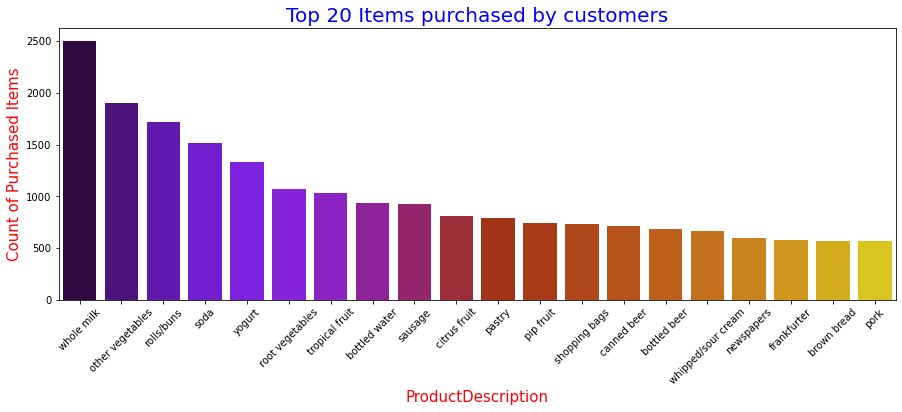

In [97]:
plt.figure(figsize=(15,5))
sns.barplot(x = ds.Description.value_counts().head(20).index, y = ds.Description.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('ProductDescription', color = 'red', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Purchased Items', color = 'red', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'blue', size = 20)
plt.show()

# Another Graph Between Top 20 items which is purchased by customers and Count of Purchased items.

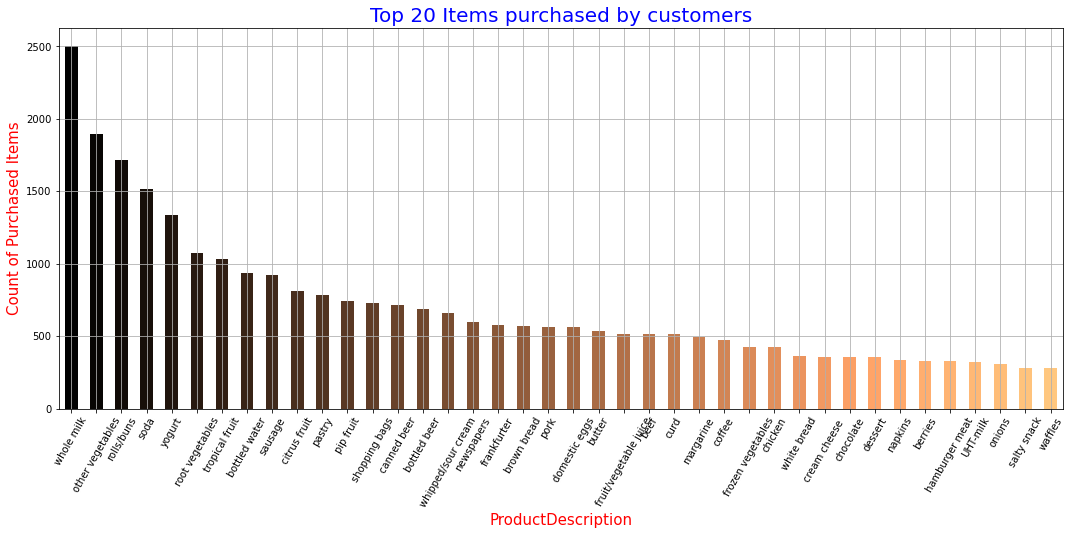

In [98]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
ds['Description'].value_counts().head(40).plot.bar(color = color)
plt.title('Top 20 Items purchased by customers',color ='blue', fontsize = 20)
plt.xlabel('ProductDescription', color = 'red', size = 15,)
plt.ylabel('Count of Purchased Items', color = 'red', size = 15)
plt.xticks(rotation = 60 )
plt.grid()
plt.show()

# Count the Values of Items How Many times A perticular item purchased by Customers. 

In [99]:
ds['Description'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
frozen chicken              5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: Description, Length: 167, dtype: int64

# Grouping the Dataset to form a list of items bought by same customer on same date and get the Top 10 dates result.

In [100]:
#grouping dataset to form a list of items bought by same customer on same date
ds=ds.groupby(['Member_number','Date'])['Description'].apply(lambda x: list(x))

In [101]:
ds.head(10)

Member_number  Date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
1001           2014-07-02                    [sausage, whole milk, rolls/buns]
               2014-12-12                                   [whole milk, soda]
               2015-01-20              [frankfurter, soda, whipped/sour cream]
               2015-02-05                                  [frankfurter, curd]
               2015-04-14                                  [beef, white bread]
Name: Description, dtype: object

In [102]:
ds.shape

(14963,)

**NOW THE DATASET HAS 14963 ROWS**

# use Apriori to form the dataset into a List.

In [103]:
#apriori takes list as an input, hence converting dtaset to a list
transactions = ds.values.tolist()
transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

In [104]:
#applying apriori
from apyori import apriori
rules = apriori(transactions, min_support=0.00030,min_confidence = 0.05,min_lift = 2,min_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({'soda', 'artif. sweetener'}), support=0.00046782062420637575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'soda'}), confidence=0.2413793103448276, lift=2.4857251346797353)]),
 RelationRecord(items=frozenset({'berries', 'condensed milk'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'condensed milk'}), items_add=frozenset({'berries'}), confidence=0.05102040816326531, lift=2.34177413296607)]),
 RelationRecord(items=frozenset({'whole milk', 'brandy'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)]),
 RelationRecord(items=frozenset({'butter', 'sweet spreads'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sweet spreads'}), items_add=frozenset({'butter'}), confid

# get the Length of the Result. 

In [105]:
len(results)

104

# To get the ordered items in the form of Support, Confidence and Lift.

In [106]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [107]:
ordered_results

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,artif. sweetener,soda,0.000468,0.241379,2.485725
1,condensed milk,berries,0.000334,0.051020,2.341774
2,brandy,whole milk,0.000869,0.342105,2.166281
3,sweet spreads,butter,0.000334,0.073529,2.087705
4,liver loaf,canned beer,0.000401,0.120000,2.557778
...,...,...,...,...,...
99,rolls/buns,yogurt,0.000601,0.204545,2.381800
100,shopping bags,yogurt,0.000401,0.206897,2.409178
101,whole milk,sausage,0.001470,0.131737,2.182917
102,other vegetables,whole milk,0.000334,0.090909,7.817659


In [108]:
!pip install wordcloud


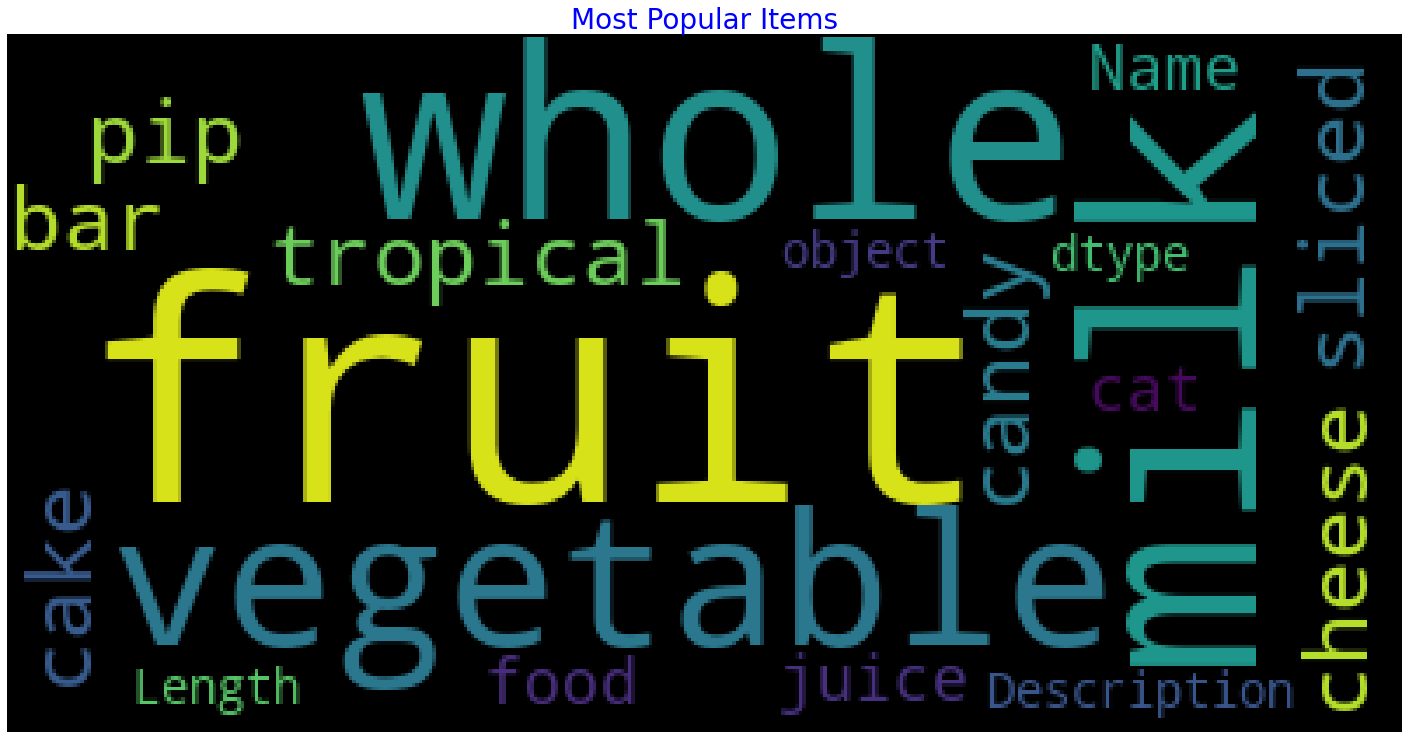

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (25, 25)
wordcloud = WordCloud(background_color = 'black',  max_words = 500).generate(str(ds['Description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 28, color = 'blue')
plt.show()

# <font color = blue> ..."""THANKYOU"""... </font>

1. <font color = red> <b> RAJKUMAR CHOUDHARY </font>
       +91 89891-24888
2. <font COLOR = purple> <b> RASHMI PARDESI </font>
       +91 70000-28070
3. <font color = brown> <b> DIKSHANT PANDEY </font>
       +91 99779-19099